# Multicomponent Enrichment

This demonstrates how the total normalized flowrate $L_t/F$ in 
a matched abundance ratio enrichment cascade changes as a function 
of the key mass $M^*$, an optimization parameter.

In [1]:
import time
import numpy as np
import matplotlib
matplotlib.rc('font', family='serif', size=16)
import matplotlib.pyplot as plt
%matplotlib inline
from pyne import enrichment as enr

NPOINTS = 50
duc = enr.default_uranium_cascade()
mstars = np.linspace(235.1, 237.9, NPOINTS)

/home/tyler/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: QAWarning: pyne.data is not yet QA compliant.
  return f(*args, **kwds)
/home/tyler/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: QAWarning: pyne.material is not yet QA compliant.
  return f(*args, **kwds)
/home/tyler/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: QAWarning: pyne.enrichment is not yet QA compliant.
  return f(*args, **kwds)


In [2]:
start = time.time()
flowrates = []
for mstar in mstars:
    duc.Mstar = mstar
    casc = enr.solve_symbolic(duc)
    flowrates.append(casc.l_t_per_feed)
print("calc took {0:.3g} ms.".format((time.time()-start) * 1e3))

calc took 8.41 ms.


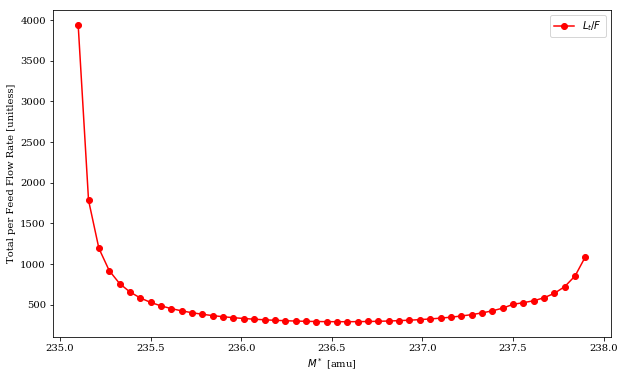

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
plt.plot(mstars, flowrates, 'r-o', label='$L_t/F$')
plt.xlabel('$M^*$ [amu]')
plt.ylabel('Total per Feed Flow Rate [unitless]')
lgd = plt.legend(loc=0)